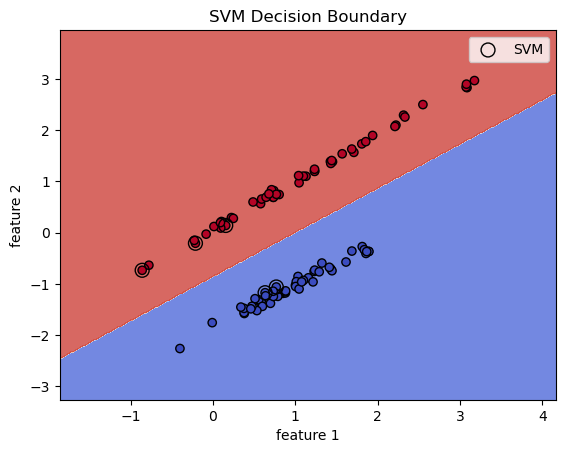

支持向量:
 [[ 0.63356167 -1.17278867]
 [ 0.76916909 -1.0609667 ]
 [ 0.15559223  0.14096222]
 [-0.21198653 -0.20665158]
 [-0.85852241 -0.73473514]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

# 生成合成数据
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=42)

# 使用线性核训练SVM
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# 绘制决策边界
def plot_decision_boundary(X, y, model):
    h = .02  # 网格中的步长
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='SVM')
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.title('SVM Decision Boundary')
    plt.legend()
    plt.show()

plot_decision_boundary(X, y, clf)

# 打印支持向量
print("支持向量:\n", clf.support_vectors_)

## Kernel Tricks

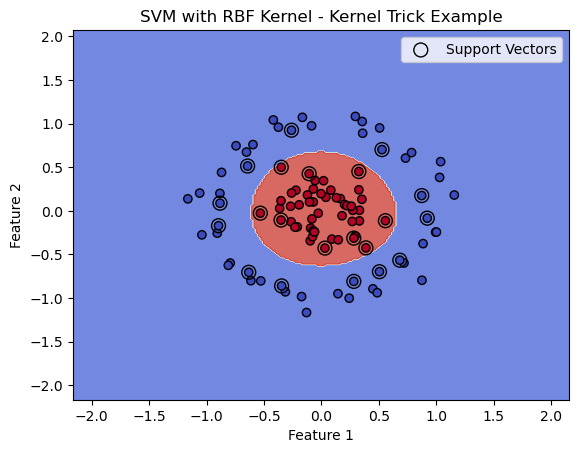

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_circles

# Generate non-linearly separable data (concentric circles)
X, y = make_circles(n_samples=100, factor=0.3, noise=0.1, random_state=42)

# Train SVM with RBF kernel
clf_rbf = svm.SVC(kernel='rbf', C=1.0, gamma='scale')
clf_rbf.fit(X, y)

# Plot decision boundary and data points
def plot_decision_boundary(X, y, model):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], 
                s=100, facecolors='none', edgecolors='k', label='Support Vectors')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM with RBF Kernel - Kernel Trick Example')
    plt.legend()
    plt.show()

plot_decision_boundary(X, y, clf_rbf)

The kernel trick in SVMs enables non-linear separation by implicitly mapping data to a higher-dimensional space without computing the transformation explicitly. Here’s how it works in the provided code:

1. **Data**: The code uses `make_circles` to generate a 2D dataset of concentric circles, which is non-linearly separable in 2D space (Feature 1, Feature 2).

2. **Kernel Trick**: The SVM uses an RBF (Radial Basis Function) kernel (`kernel='rbf'`). This kernel computes similarity between points as if they were in a higher-dimensional space. For two points $\mathbf{x}_i$ and $\mathbf{x}_j$, the RBF kernel is:

   $$ K(\mathbf{x}_i, \mathbf{x}_j) = \exp(-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2) $$

   This kernel effectively maps the 2D points into a higher-dimensional space where a linear boundary (hyperplane) can separate the inner and outer circles.

3. **Why Higher Dimension?**: In 2D, no straight line can separate the circles. The RBF kernel transforms the data into a space where points closer in 2D (same class) have high similarity, and points far apart (different classes) have low similarity. For example, the 2D circles might be mapped to a 3D space where one class forms a "bowl" and the other a "ring," separable by a plane. The kernel computes dot products in this space without explicitly calculating the coordinates.

4. **Code Mechanics**:
   - `svm.SVC(kernel='rbf', C=1.0, gamma='scale')`: Trains an SVM with the RBF kernel. The `gamma` parameter controls the shape of the decision boundary.
   - `plot_decision_boundary`: Visualizes the decision boundary in 2D. The contour plot shows the non-linear boundary created by the kernel, which separates the circles. The boundary is the 2D projection of the higher-dimensional hyperplane.
   - Support vectors (circled points) are critical points near the boundary that define the hyperplane.

5. **Why You Don’t See the Higher Dimension**: The kernel trick avoids explicitly computing the high-dimensional coordinates, making it computationally efficient. The plot remains in 2D, showing the decision boundary as a complex curve, which is the result of the higher-dimensional linear separation projected back to 2D.

In essence, the RBF kernel allows the SVM to "see" the data as if it’s in a higher-dimensional space, creating a non-linear boundary in 2D that perfectly separates the circles, as shown in the plot.